# Data Visualization

Through these notebooks, I would like to summarize some of the most common plot skills needed to be able to talk about data by graphs.

- Plotting (matplotlib)
    - Line
    - Scatter
    - Histogram
    - Heatmap
    - Faceting
- Interactive plots (Plotly)
- Mapping

## Dependencies

In [191]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

The style used is so relevant because things like the colors, background, or font have to be carefully selected. In this case, I'm going to use the seaborn style. 

In [2]:
# use seaborn style
sns.set()
sns.set_style('darkgrid')

## Plotting (matplotlib)

I have decided to use Matplotlib as my base level to plot everything because it gives you the whole control of the graph. That being said, Seaborn is so useful if we have to make quick plots.

### Line

#### 1.

Highlight how the events described below have affected the call money rate (TGT).

- 1973-11: Oil Price Shock
- 1991-01 - 1993-12: Recession in Switzerland
- 2009-01 – 2009-12: Recession in Switzerland
- 2008-09: Lehman-Brothers collapse
- 2011-08: Introduction of CHF/EUR floor
- 2015-01: Removal of CHF/EUR floor

##### Import data

In [9]:
data_path_1 = "../Data/snb-data-zimoma-en-all-20200901_1437.csv"
snb_df = pd.read_csv(data_path_1, sep=";", skiprows=2)

In [10]:
snb_df

,Date,D0,Value
0,1972-01,SARON,NaN
1,1972-01,1TGT,0.00000
2,1972-01,EG3M,NaN
3,1972-01,1M,NaN
4,1972-01,3M0,NaN
...,...,...,...
6419,2020-08,12M,-0.52460
6420,2020-08,3M1,0.24088
6421,2020-08,3M2,-0.05783
6422,2020-08,3M3,0.06400


##### Feature engineering

In [11]:
# rename a column
snb_df = snb_df.rename({'D0': 'Instrument'}, axis=1)

# transform the Date column to datetime type
snb_df['Date'] = pd.to_datetime(snb_df['Date'])

Overnight (`SARON`), call money rate (`1TGT`), 1, 3, 6, and 12-month CHF-denominated loans (`1M`, `3M0`, `6M`, `12M`, respectively), and USD, JPY, GBP, and EUR-denominated loans (`3M1`, `3M2`, `3M3`, and `3M4`, respectively)

In [12]:
# Use Date as the index column, 
# and pivot the Value column to transform their values in different columns (unstack())
snb_df = snb_df.set_index(['Date', 'Instrument']).unstack()['Value']

# sort the columns
term_order = ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
snb_df = snb_df[term_order]

In [14]:
snb_df.head()

Instrument,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Plotting

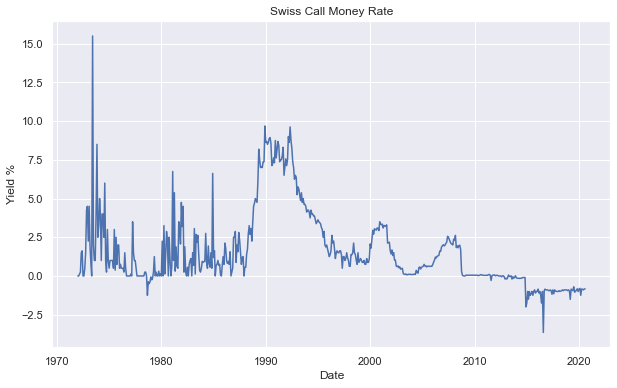

In [15]:
# the call money rate (TGT) over the time
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(snb_df.index, snb_df["1TGT"])

ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("Date")
ax.set_ylabel("Yield %");

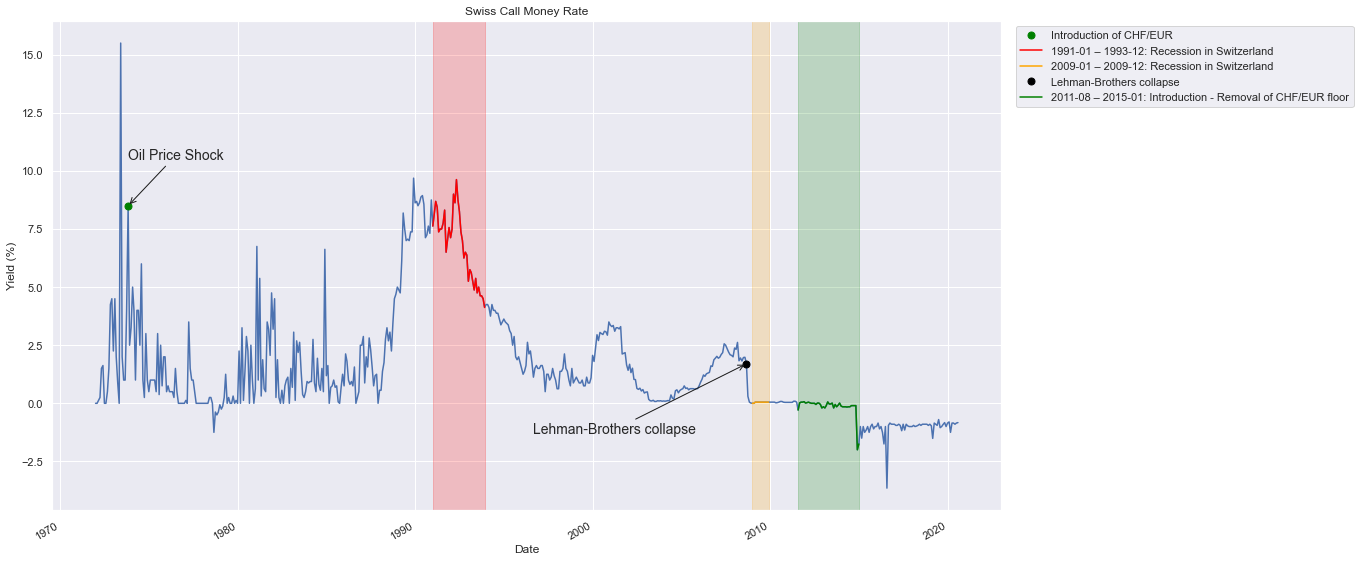

In [181]:
# Here I'm firstly creating the dataframe and then plotting it

fig, ax = plt.subplots(figsize=(17, 10))
ax.plot(snb_df.index, snb_df["1TGT"])
ax.set_title("Swiss Call Money Rate")
ax.set_xlabel("")
ax.set_ylabel("Yield (%)")

# 1973-11: Oil Price Shock
a_TGT_1973_01 = snb_df[snb_df.index == "1973-11"]['1TGT']

a_TGT_1973_01.plot(kind="line", style="o", ms=7, c="green", label='Introduction of CHF/EUR')

arrow_x = str(a_TGT_1973_01.index[0])
arrow_y = a_TGT_1973_01
text_x = str(a_TGT_1973_01.index[0])
text_y = arrow_y + 2
ax.annotate('Oil Price Shock', xy=(arrow_x, arrow_y), xytext=(text_x, text_y), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)


# 1991-01 – 1993-12: Recession in Switzerland
b_recession = snb_df[(snb_df.index.year >= 1991) & (snb_df.index.year <= 1993)]

b_recession["1TGT"].plot(kind="line", c="red", label='1991-01 – 1993-12: Recession in Switzerland')
ax.axvspan("1991-01", "1993-12", color="red", alpha=0.2);


# 2009-01 – 2009-12: Recession in Switzerland
c_recession = snb_df[(snb_df.index.year == 2009)]

c_recession["1TGT"].plot(kind="line", c="orange", label='2009-01 – 2009-12: Recession in Switzerland')
ax.axvspan("2009-01", "2009-12", color="orange", alpha=0.2)


# 2008-09: Lehman-Brothers collapse
d_collapse = snb_df[(snb_df.index == "2008-09")]

# plotting
d_collapse["1TGT"].plot(kind="line", style="o", ms=7, c="black", label='Lehman-Brothers collapse')

arrow_xd = str(d_collapse.index[0])
arrow_yd = d_collapse["1TGT"]
text_xd = "1996-09"
text_yd = arrow_yd - 3
ax.annotate('Lehman-Brothers collapse', xy=(arrow_xd, arrow_yd), xytext=(text_xd, text_yd), arrowprops=dict(arrowstyle="->", color='k'), fontsize=14)


# 2011-08: Introduction of CHF/EUR floor # 2015-01: Removal of CHF/EUR floor
    # dataframe
e_CHF = c_recession = snb_df[(snb_df.index >= '2011-08') & (snb_df.index <= '2015-01')]
    # plotting
e_CHF["1TGT"].plot(kind="line", c="green", label='2011-08 – 2015-01: Introduction - Removal of CHF/EUR floor')
ax.axvspan("2011-08", "2015-01", color="green", alpha=0.2)

# Implementing the legend
ax.legend(bbox_to_anchor=(1.01, 1), loc=2);

# save the plot in a pdf (This file I could edit it in Illustrator)
plt.savefig('images/Swiss_economy.png', bbox_inches='tight')

#### 2.

Analyze the daily deaths in France over the last 20 years and highlight the biggest anomalies found in the data.

##### Import data

In [22]:
# Data on the daily number of deaths in France from 1 Jan, 2000 to 18 May, 2020.
data_path_2 = '../Data/morts_2020-05-18.csv'
mort_df = pd.read_csv(data_path_2)

In [23]:
mort_df.head()

,mois_jour,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,01/01,1974,1670.0,1886.0,1640.0,1798,1757.0,1699.0,1779.0,1815,...,1819.0,1813,1874.0,1701.0,1877.0,1761,2204.0,2027.0,1839,1895.0
1,01/02,2040,1777.0,1927.0,1801.0,1829,1537.0,1765.0,1757.0,1881,...,1810.0,1754,1872.0,1780.0,1972.0,1797,2371.0,2142.0,1935,1892.0
2,01/03,2086,1775.0,1850.0,1701.0,1807,1672.0,1813.0,1774.0,1881,...,1881.0,1743,1866.0,1712.0,1958.0,1726,2352.0,2137.0,1880,1940.0
3,01/04,2080,1701.0,1887.0,1605.0,1701,1679.0,1720.0,1799.0,1898,...,1814.0,1762,1803.0,1693.0,1856.0,1835,2251.0,2160.0,1900,1821.0
4,01/05,2039,1697.0,1792.0,1569.0,1901,1665.0,1661.0,1749.0,1853,...,1875.0,1757,1748.0,1618.0,1978.0,1778,2272.0,2099.0,1921,1734.0


##### Feature engineering

In [24]:
# To be able to plot each day we are going to create two new columns, one of days and the other wih months
month_day_df = mort_df['mois_jour'].str.split("/", expand=True)
month_day_df.columns = ['month', 'day']
month_day_df = month_day_df.astype('int32')
mort_df = month_day_df.join(mort_df)

# Get rid of Feb 29, we can ignore it
mort_df = mort_df.dropna(axis=0, subset=['2001'])

In [25]:
mort_df.head()

,month,day,mois_jour,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,1,01/01,1974,1670.0,1886.0,1640.0,1798,1757.0,1699.0,...,1819.0,1813,1874.0,1701.0,1877.0,1761,2204.0,2027.0,1839,1895.0
1,1,2,01/02,2040,1777.0,1927.0,1801.0,1829,1537.0,1765.0,...,1810.0,1754,1872.0,1780.0,1972.0,1797,2371.0,2142.0,1935,1892.0
2,1,3,01/03,2086,1775.0,1850.0,1701.0,1807,1672.0,1813.0,...,1881.0,1743,1866.0,1712.0,1958.0,1726,2352.0,2137.0,1880,1940.0
3,1,4,01/04,2080,1701.0,1887.0,1605.0,1701,1679.0,1720.0,...,1814.0,1762,1803.0,1693.0,1856.0,1835,2251.0,2160.0,1900,1821.0
4,1,5,01/05,2039,1697.0,1792.0,1569.0,1901,1665.0,1661.0,...,1875.0,1757,1748.0,1618.0,1978.0,1778,2272.0,2099.0,1921,1734.0


In [26]:
# Create a list with the name of the month in each row, to be able to plot then the data of each of them
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
month_cutoff = np.array([0] + days_in_month).cumsum()[:-1]
month_names = [datetime.date(2020, i+1, 1).strftime("%h") for i in range(len(days_in_month))]

In [28]:
month_cutoff

array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334],
      dtype=int32)

In [27]:
month_names

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

##### Plotting

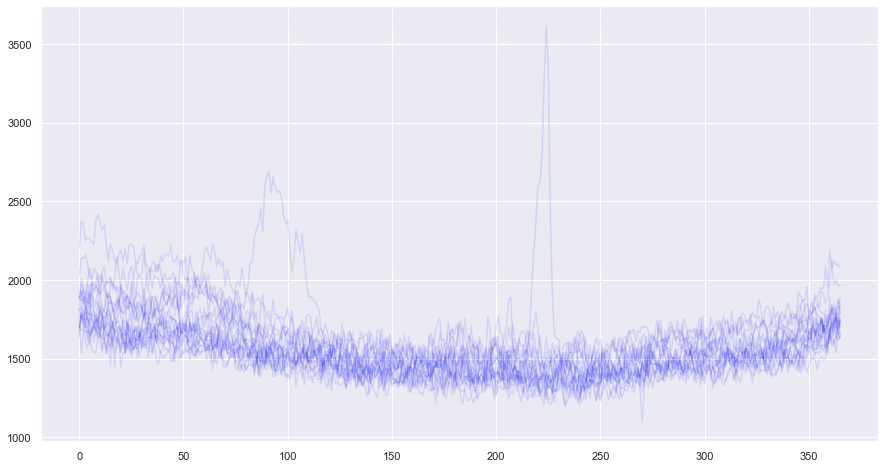

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))

for year in mort_df.columns[4:]:
    ax.plot(mort_df.index, mort_df[year], alpha=0.1, color="blue")

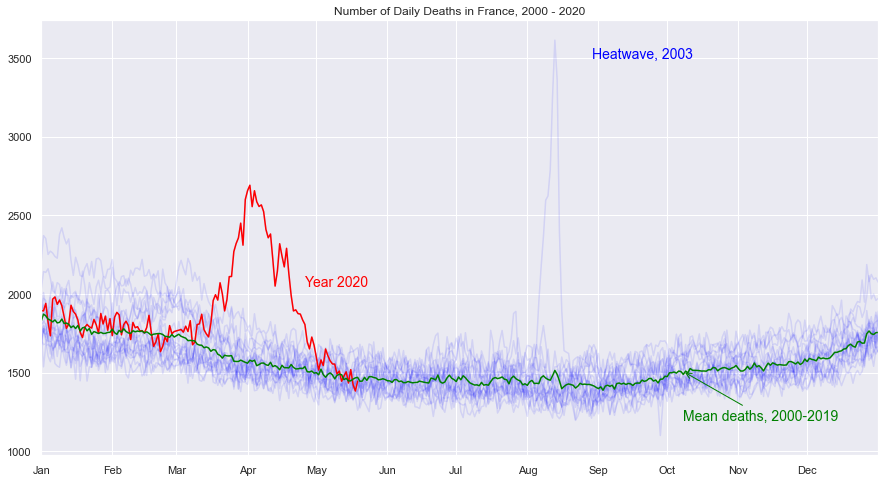

In [182]:
fig, ax = plt.subplots(figsize=(15, 8))

for year in mort_df.columns[4:]:
    ax.plot(mort_df.index, mort_df[year], alpha=0.1, color="blue")
    
ax.plot(mort_df.index, mort_df["2020"], color="red")
    
ax.set_xlim([0, 365])
ax.set_xticks(month_cutoff)
ax.set_title("Number of Daily Deaths in France, 2000 - 2020")
ax.set_xticklabels(month_names);
ax.annotate(xy=[115,mort_df["2020"][25] + 300], text="Year 2020", color = "red", fontsize=14)

ax.annotate(xy=[8 * 30 ,3500], text="Heatwave, 2003", color = "blue", fontsize=14)

normal_years = [str(year) for year in range(2000, 2020)]
mort_mean = mort_df[normal_years].mean(axis=1)
ax.plot(mort_mean, c="green")
arrow_x = mort_mean.index[9*31]
arrow_y = mort_mean[9*31]
text_x = mort_mean.index[9*31]
text_y = 1200
ax.annotate(text="Mean deaths, 2000-2019", color = "green", xy=(arrow_x, arrow_y), xytext=(text_x, text_y), arrowprops=dict(arrowstyle="->", color='green'), fontsize=14)

# save the plot in a pdf (This file I could edit it in Illustrator)
plt.savefig('images/mort_france.png', bbox_inches='tight')

### Scatter

#### 3.

Data about a selection of automobiles in two years: 1999 and 2008. Includes information about the manufacturer and model of each car, as well as data on the type of car (`class`), the size of the engine (`displ`, `cyl`), the type of transmission (`trans`), and city and highway fuel efficiency (`cty`, `hwy`) in miles/gallon of fuel units.

- Compare the Engine Size versus the highway fuel efficiency, to know if there is a correlation between this two variables.

##### Import data

In [58]:
data_path_3 = "../Data/mpg.csv"
mpg_df = pd.read_csv(data_path_3)
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


##### Feature engineering

In [59]:
# Structuring the data
best_df = mpg_df[mpg_df['hwy'] == max(mpg_df['hwy'])].reset_index(drop=True)
best_df_u = best_df["manufacturer"].unique()

worst_df = mpg_df[mpg_df['hwy'] == min(mpg_df['hwy'])].reset_index(drop=True)
worst_df_u = worst_df["manufacturer"].unique()

In [60]:
# To know the relationship between both variables I'm going to create a function to calculate it
import statsmodels.formula.api as smf

def fit_and_predict(df):
    # fit a model explaining hwy fuel mileage through displacement
    lm = smf.ols(formula="hwy ~ displ", data=df).fit()
    
    # find two points on the line represented by the model
    x_bounds = [df['displ'].min(), df['displ'].max()]
    preds_input = pd.DataFrame({'displ': x_bounds})
    predictions = lm.predict(preds_input)
    return lm, pd.DataFrame({'displ': x_bounds, 'hwy': predictions})


lm, pred = fit_and_predict(mpg_df)
rsquared = lm.rsquared

##### Plotting

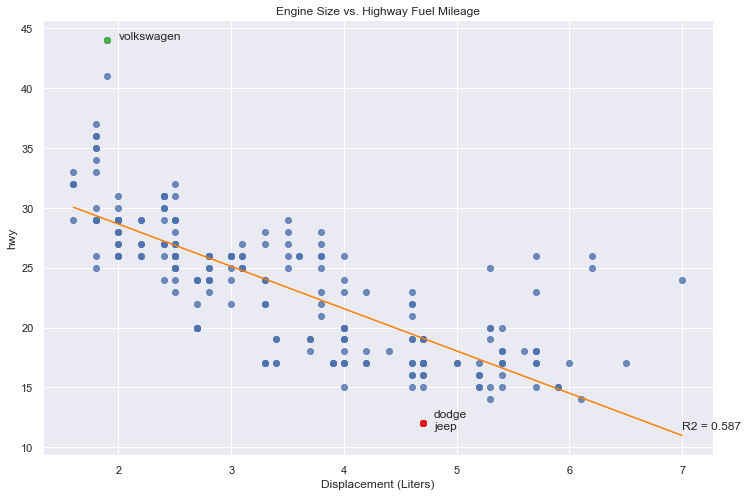

In [183]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(mpg_df['displ'], mpg_df['hwy'], alpha=0.8)

ax.set_title("Engine Size vs. Highway Fuel Mileage")
ax.set_xlabel("Displacement (Liters)")
ax.set_ylabel("hwy");

# Use Brewer Set1 green for the best (#4DAF4A) and the red for the worst (#E41A1C)
# Make the dot size larger (10 points, s = 100)
# Label the point with manufacturer(s) of automobile (column manufacturer in the dataframe)

ax.scatter(best_df['displ'], best_df['hwy'], color ="#4DAF4A", alpha=0.9)
ax.annotate(xy=[best_df['displ'][0] + 0.1, best_df["hwy"][0] + 0.1], text=best_df_u[0])

ax.scatter(worst_df['displ'], worst_df['hwy'], color ="#E41A1C", alpha=0.9)
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] + 0.5], text=worst_df_u[0])
ax.annotate(xy=[worst_df['displ'][0] + 0.1, worst_df["hwy"][0] - 0.5], text=worst_df_u[1])

ax.plot(pred["displ"], pred["hwy"], c="#ff7f00");
ax.annotate(xy=[pred["displ"][1], pred["hwy"][1] + 0.5], text="R2 = {}".format(round(rsquared,3)));

# save the plot in a pdf (This file I could edit it in Illustrator)
plt.savefig('images/Engine_Size_highway.png', bbox_inches='tight')

**Faceting** can be used to show more data, provide context, and make a visualization easier to undersatand.

That's why based on the same concept as the previous exercise, we are going to separate the results according to the type of car model involved.

In [62]:
new_mpg_df = mpg_df.groupby('class').mean()["displ"].sort_values()
new_mpg_df 

class
compact       2.325532
subcompact    2.660000
midsize       2.921951
minivan       3.390909
pickup        4.418182
suv           4.456452
2seater       6.160000
Name: displ, dtype: float64

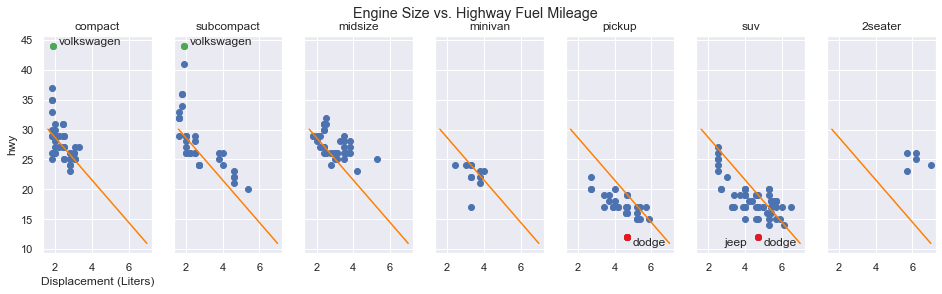

In [184]:
fig, axs = plt.subplots(1, 7, figsize=(16, 4), sharex=True, sharey=True)

for i, value in enumerate(new_mpg_df.index):
    df = mpg_df[mpg_df["class"] == value]
    axs[i].scatter(df['displ'], df['hwy'])
    axs[i].set_title(value)
    if i < 1:
        axs[i].set_ylabel('hwy')
        axs[i].set_xlabel('Displacement (Liters)')
    if df['hwy'].min() == worst_df['hwy'][0]:
        mn = df['hwy'].min()
        
        axs[i].scatter(df[df['hwy'].isin([mn])]['displ'], df[df['hwy'].isin([mn])]['hwy'], color ="#E41A1C", alpha=0.9)
        axs[i].annotate(xy=[df[df['hwy'].isin([mn])]['displ'].iloc[0] + 0.3, df[df['hwy'].isin([mn])]['hwy'].iloc[0] - 1.5], text=df[df['hwy'].isin([mn])]['manufacturer'].iloc[0])
        if len(df[df['hwy'].isin([mn])].groupby("manufacturer"))>1:
            axs[i].annotate(xy=[df[df['hwy'].isin([mn])]['displ'].iloc[0] - 1.8, df[df['hwy'].isin([mn])]['hwy'].iloc[0] - 1.5], text=df[df['hwy'].isin([mn])]['manufacturer'].iloc[1])
    
    
    if df['hwy'].max() == best_df['hwy'][0]:
        mx = df['hwy'].max()
        
        axs[i].scatter(df[df['hwy'].isin([mx])]['displ'], df[df['hwy'].isin([mx])]['hwy'], color ="#4DAF4A", alpha=0.9)
        axs[i].annotate(xy=[df[df['hwy'].isin([mx])]['displ'].iloc[0] + 0.3, df[df['hwy'].isin([mx])]['hwy'].iloc[0] + 0.1], text=df[df['hwy'].isin([mx])]['manufacturer'].iloc[0])
        if len(df[df['hwy'].isin([mx])].groupby("manufacturer"))>1:
            axs[i].annotate(xy=[df[df['hwy'].isin([mx])]['displ'].iloc[0] + 0.1,df[df['hwy'].isin([mx])]['hwy'].iloc[0] + 0.1], text=df[df['hwy'].isin([mx])]['manufacturer'].iloc[1])

    
    axs[i].plot(pred["displ"], pred["hwy"], c="#ff7f00")

fig.suptitle("Engine Size vs. Highway Fuel Mileage");

# save the plot in a pdf (This file I could edit it in Illustrator)
plt.savefig('images/Engine_Size_highway_type.png', bbox_inches='tight')

### Histogram

#### 4.

Data on the dosage of antibiotic (mic or minimum inhibitory concentration in  𝜇 g/ml) necessary to kill various bacteria, and the gram-type of each bacterium.

- Plot the mic column for penicillin as a bar chart.

##### Import data

In [152]:
path_data_4 = "../Data/burtin.json"
antibiotics_df = pd.read_json(path_data_4, orient='records').set_index(['bacteria', 'gram'])
# orient indication of expected JSON string format.
# 'records' : list like [{column -> value}, ... , {column -> value}]

antibiotics_df.head()

,,penicillin,streptomycin,neomycin
bacteria,gram,,,
Mycobacterium tuberculosis,negative,800.0,5.0,2.00
Salmonella schottmuelleri,negative,10.0,0.8,0.09
Proteus vulgaris,negative,3.0,0.1,0.10
Klebsiella pneumoniae,negative,850.0,1.2,1.00
Brucella abortus,negative,1.0,2.0,0.02


In [187]:
# pivot the columns of antibiotics in one with the names and other with the values
antibiotics_df = antibiotics_df.stack().reset_index()
antibiotics_df.head()

,level_0,level_1,0
0,0,bacteria,Mycobacterium tuberculosis
1,0,gram,negative
2,0,antibiotic,penicillin
3,0,mic,800.0
4,0,bid,6


##### Feature engineering

In [154]:
# mic = minimum inhibitory concentration
antibiotics_df.columns = ['bacteria', 'gram', 'antibiotic', 'mic']
# assign an id to each bacterium
bid_dict = {b:i for i, b in enumerate(sorted(pd.unique(antibiotics_df['bacteria'])))}
antibiotics_df['bid'] = antibiotics_df.apply(lambda x: bid_dict[x['bacteria']], 1)
# extract the genus of each bacterium
antibiotics_df['genus'] = antibiotics_df['bacteria'].apply(lambda x: x.split(" ")[0])
antibiotics_df.head()

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.0,6,Mycobacterium
1,Mycobacterium tuberculosis,negative,streptomycin,5.0,6,Mycobacterium
2,Mycobacterium tuberculosis,negative,neomycin,2.0,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.0,10,Salmonella
4,Salmonella schottmuelleri,negative,streptomycin,0.8,10,Salmonella


##### Plotting

In [155]:
df_51 = antibiotics_df[antibiotics_df["antibiotic"] == "penicillin"]

In [156]:
df_51

,bacteria,gram,antibiotic,mic,bid,genus
0,Mycobacterium tuberculosis,negative,penicillin,800.000,6,Mycobacterium
3,Salmonella schottmuelleri,negative,penicillin,10.000,10,Salmonella
6,Proteus vulgaris,negative,penicillin,3.000,7,Proteus
9,Klebsiella pneumoniae,negative,penicillin,850.000,5,Klebsiella
12,Brucella abortus,negative,penicillin,1.000,1,Brucella
15,Pseudomonas aeruginosa,negative,penicillin,850.000,8,Pseudomonas
18,Escherichia coli,negative,penicillin,100.000,4,Escherichia
21,Salmonella (Eberthella) typhosa,negative,penicillin,1.000,9,Salmonella
24,Aerobacter aerogenes,negative,penicillin,870.000,0,Aerobacter
27,Brucella antracis,positive,penicillin,0.001,2,Brucella


In [157]:
sort_list = list(df_51.sort_values("mic", ascending=True).bacteria)
sort_list

['Brucella antracis',
 'Streptococcus hemolyticus',
 'Streptococcus viridans',
 'Diplococcus pneumoniae',
 'Staphylococcus albus',
 'Staphylococcus aureus',
 'Brucella abortus',
 'Salmonella (Eberthella) typhosa',
 'Streptococcus fecalis',
 'Proteus vulgaris',
 'Salmonella schottmuelleri',
 'Escherichia coli',
 'Mycobacterium tuberculosis',
 'Klebsiella pneumoniae',
 'Pseudomonas aeruginosa',
 'Aerobacter aerogenes']

In [158]:
df_plot = df_51.sort_values("mic", ascending=True).reset_index(drop=True)
df_plot

,bacteria,gram,antibiotic,mic,bid,genus
0,Brucella antracis,positive,penicillin,0.001,2,Brucella
1,Streptococcus hemolyticus,positive,penicillin,0.001,14,Streptococcus
2,Streptococcus viridans,positive,penicillin,0.005,15,Streptococcus
3,Diplococcus pneumoniae,positive,penicillin,0.005,3,Diplococcus
4,Staphylococcus albus,positive,penicillin,0.007,11,Staphylococcus
5,Staphylococcus aureus,positive,penicillin,0.030,12,Staphylococcus
6,Brucella abortus,negative,penicillin,1.000,1,Brucella
7,Salmonella (Eberthella) typhosa,negative,penicillin,1.000,9,Salmonella
8,Streptococcus fecalis,positive,penicillin,1.000,13,Streptococcus
9,Proteus vulgaris,negative,penicillin,3.000,7,Proteus


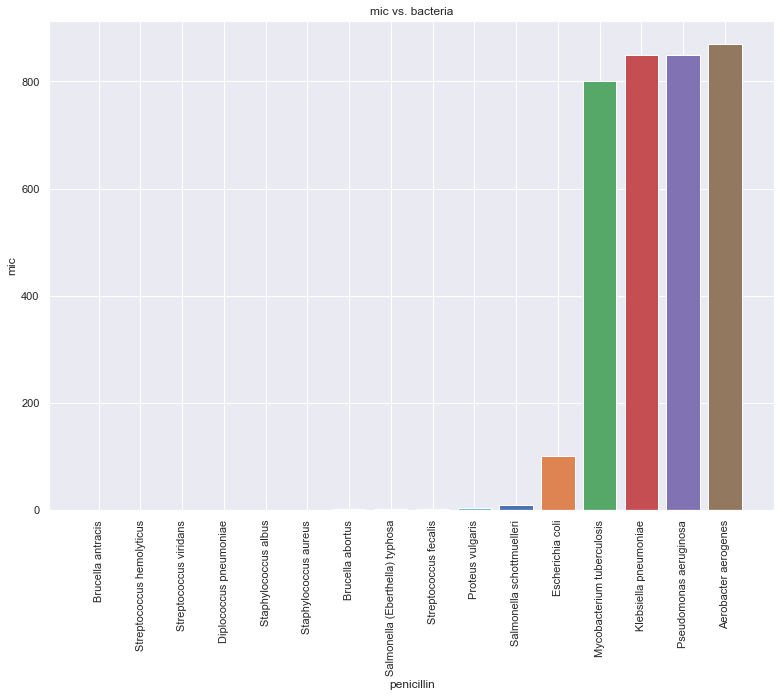

In [165]:
fig, ax = plt.subplots(figsize=(13,9))

ax.bar(df_plot["bacteria"], df_plot["mic"], color=sns.color_palette())

ax.set_xlabel('penicillin')
ax.set_ylabel('mic')
ax.set_title('mic vs. bacteria')
ax.xaxis.set_tick_params(rotation=90)

**Data transformations** can make a chart easier to understand and are necessary to even be able to present the data in some cases.

Considering that the required dose difference is very large among the different bacteria, it is necessary to apply a transformation, in this case the logarithmic transformation.

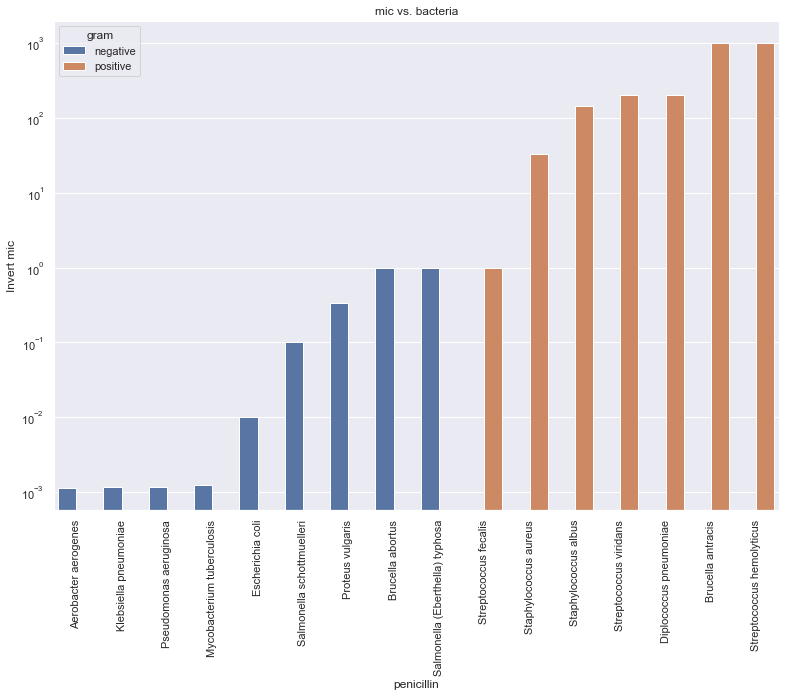

In [185]:
# Could be useful if you want to use some characteristic as hue or order

fig, ax = plt.subplots(figsize=(13,9))

ax = sns.barplot(x=df_51["bacteria"], y=1/df_51["mic"], order=df_51.sort_values("mic", ascending=False).bacteria, hue=df_51["gram"])

ax.set_xlabel('penicillin')
ax.set_ylabel('Invert mic')
ax.set_title('mic vs. bacteria')
ax.xaxis.set_tick_params(rotation=90)
ax.set_yscale("log")

# save the plot in a pdf (This file I could edit it in Illustrator)
plt.savefig('images/hist_transf.png', bbox_inches='tight')

### Heatmap

- Based on the same idea of the previous exercise, we are going to analize something similar but with more than one antibiotic and using a heatmap to visualize it.

In [171]:
df_41 = antibiotics_df[["antibiotic", "bacteria", "mic"]].copy()
df_41_pivot = antibiotics_df.pivot("bacteria", "antibiotic", "mic")
df_41_pivot.head()

antibiotic,neomycin,penicillin,streptomycin
bacteria,,,
Aerobacter aerogenes,1.600,870.000,1.00
Brucella abortus,0.020,1.000,2.00
Brucella antracis,0.007,0.001,0.01
Diplococcus pneumoniae,10.000,0.005,11.00
Escherichia coli,0.100,100.000,0.40


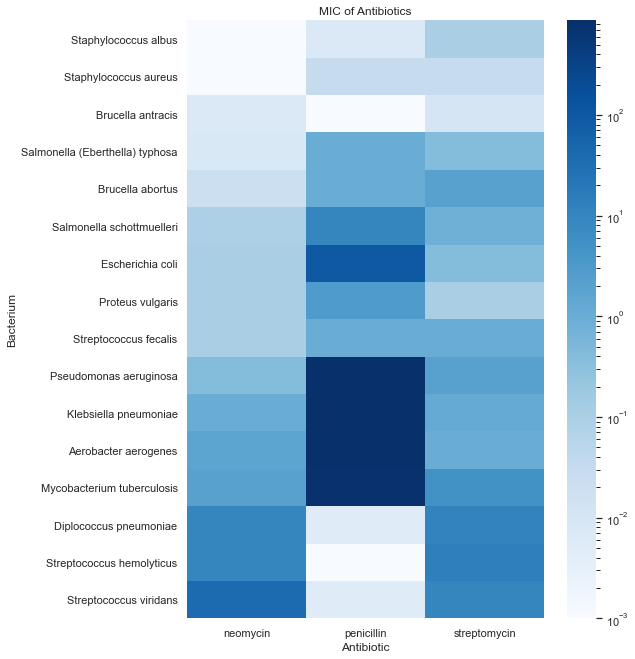

In [186]:
from matplotlib.colors import LogNorm, Normalize

x_labels = "Antibiotic"
y_labels = "Bacterium"
title = "MIC of Antibiotics"

fig, ax = plt.subplots(figsize=(8,11))

ax = sns.heatmap(df_41_pivot.sort_values("neomycin"), cmap="Blues", norm=LogNorm())

ax.set_title(title)
ax.set_xlabel(x_labels)
ax.set_ylabel(y_labels);

# save the plot in a pdf (This file I could edit it in Illustrator)
plt.savefig('images/heatmap_transf.png', bbox_inches='tight')

## Plotly

Plotly produces interactive graphs, can be embedded on websites, and provides a wide variety of complex plotting options. The visuals are of high quality and easy to read and interpret.

### 1.

In this first exercise, we are going to analyze a dataframe with records for bills and tips in a restaurant for several days and types of clients.

- Plot a boxplot comparing tips distribution for category smoker.
- Plot a scatter plot with the total bill in the x-axis and the tip in the y-axis.
- Plot a bar chart with the total bills (y-axis) per day (x-axis). Use a trace per sex.

##### Import data

In [190]:
df_restaurants = px.data.tips()
df_restaurants.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Plotting

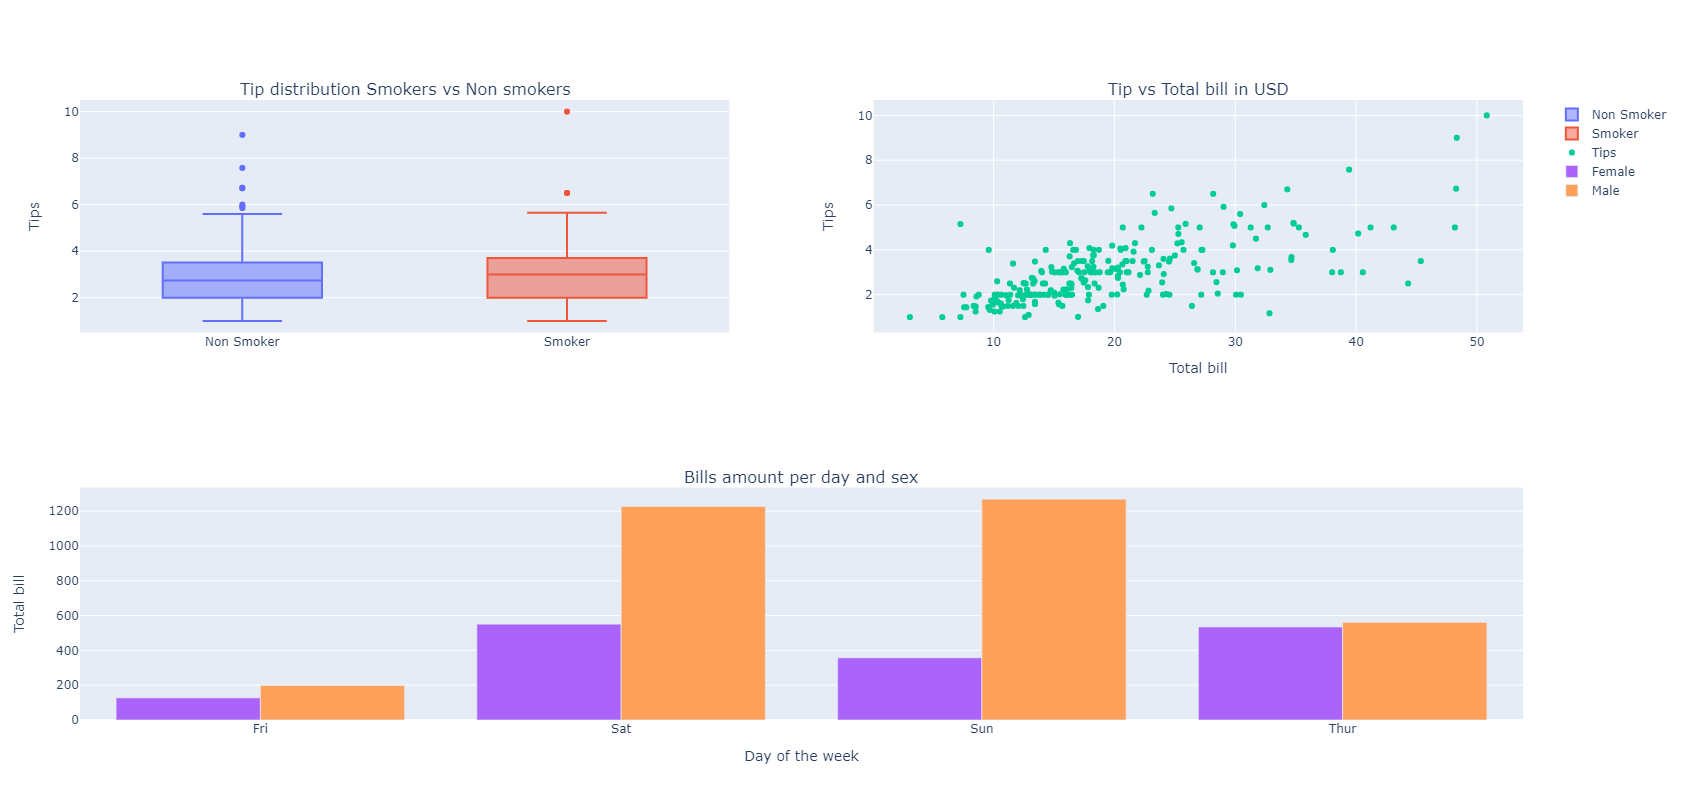

In [234]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=(
        "Tip distribution Smokers vs Non smokers",
        "Tip vs Total bill in USD", 
        "Bills amount per day and sex"
    )
)
fig.update_layout(height=800)


# Top left a box plot
fig.add_traces(
    data=[
        go.Box(y=df_restaurants[df_restaurants['smoker']=="No"]['tip'], name="Non Smoker"),
        go.Box(y=df_restaurants[df_restaurants['smoker']=='Yes']['tip'], name="Smoker")
    ], rows=[1, 1], cols=[1, 1]
)
fig.update_yaxes({'title': 'Tips'}, row=1, col=1)


# Top right scatter plot
fig.add_trace(
    go.Scatter(x=df_restaurants['total_bill'], y=df_restaurants['tip'], mode="markers", name="Tips"),
    row=1, col=2,
)
fig.update_xaxes({"title": "Total bill"}, row=1, col=2)
fig.update_yaxes({"title": "Tips"}, row=1, col=2)

# Bottom chart bar charts per day.
df_restaurants_agg = df_restaurants[['sex', 'total_bill', 'day']].groupby(['sex', 'day']).agg('sum').reset_index()
fig.add_traces(
    data=[
        go.Bar(y=df_restaurants_agg[df_restaurants_agg['sex']=='Female']['total_bill'], x=df_restaurants_agg[df_restaurants_agg['sex']=="Female"]['day'], name="Female"),
        go.Bar(y=df_restaurants_agg[df_restaurants_agg['sex']=='Male']['total_bill'], x=df_restaurants_agg[df_restaurants_agg['sex']=="Male"]['day'], name="Male"),
    ],
    rows=[2, 2], cols=[1, 1]
)
fig.update_xaxes({'title': 'Day of the week'}, row=2, col=1)
fig.update_yaxes({'title': 'Total bill'}, row=2, col=1)

fig.show()

fig.write_html("images/restaurant.html")

### 2.

Analyze a dataframe of records of different species of flowers with records for different characteristics.

- Plot a scatter plot grouping by the specie of flowers.

##### Import data

In [212]:
df_flowers = px.data.iris()
df_flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


##### Plotting

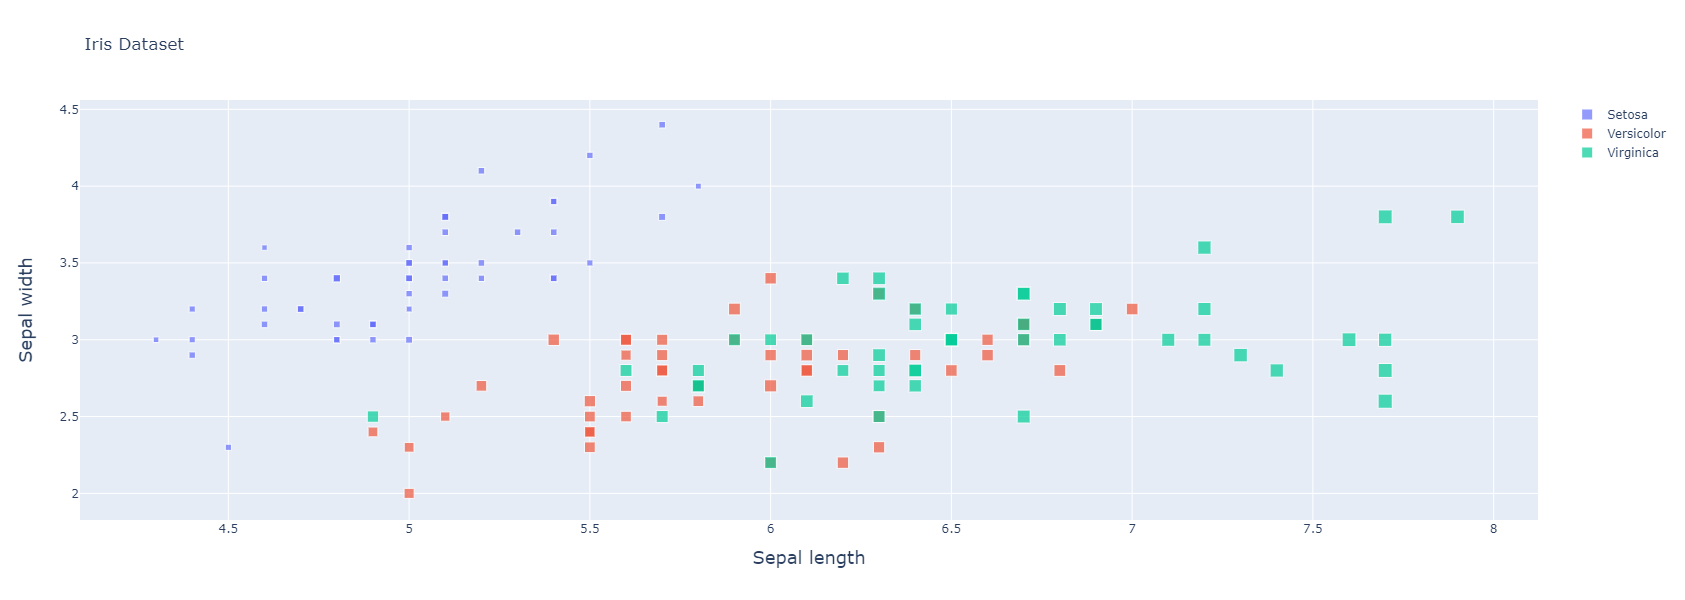

In [233]:
species = df_flowers['species'].unique()


fig = go.Figure()

for s in species:
    df_s = df_flowers[df_flowers['species']==s]
    fig.add_trace(
        go.Scatter(
            x=df_s['sepal_length'], y=df_s['sepal_width'], 
            mode="markers",
            name=s.capitalize(),
            text=df_s['species'],
            marker={
                "symbol": "square",
                "sizemode": "area", 
                "size": df_s['petal_length'], 
                "sizeref": max(df_flowers['petal_length'])*0.01
            },
            hovertemplate="<b>%{text}</b><br><br>" +
            "Sepal width: %{x:.1f}<br>" + 
            "Sepal length: %{y:.1f}<br>" +
            "Petal length: %{marker.size:.1f}<br>" +
            "<extra></extra>"
        )
    )
    
fig.update_layout(
    title="Iris Dataset",
    xaxis={"title": {"text": "Sepal length", "font_size": 18}}, # Note you can specify the size using font_size key
    yaxis={"title": {"text": "Sepal width", "font": {"size": 18}}}, # Or you can create a dictionnary if you want to add more font properties
    height=600,
    legend_itemsizing = 'constant'
#     plot_bgcolor="rgb(240, 250, 240)",
#     paper_bgcolor="rgb(240, 250, 240)"
)
    
fig.show()

fig.write_html("images/iris.html")

### 3.

Using a dataframe used before, the cars one, we are going to analyze the cars from the 70's and 80's, to realize the relation of each of them between the weight and the miles per gallon.

##### Import data

In [221]:
data_path_3 = "../Data/auto-mpg.csv"
mpg_df = pd.read_csv(data_path_3)
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


##### Plotting

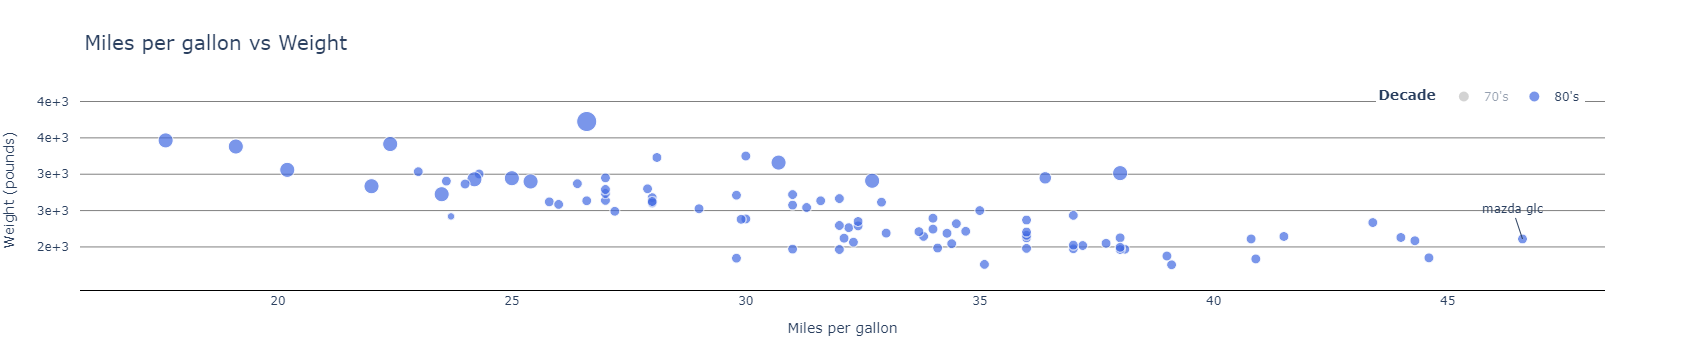

In [232]:
df_70 = mpg_df[mpg_df['model year']<80]
df_80 = mpg_df[mpg_df['model year']>=80]

fig = go.Figure(
    data=[
        go.Scatter(
            x=df_70['mpg'], y=df_70['weight'], 
            mode="markers", 
            marker={
                'size': df_70['cylinders'], 
                'sizeref': max(mpg_df['cylinders'])*0.05,
                'color': "gray"
            },
            hovertemplate =
                'MPG: %{x:.1f}'+
                '<br>Weight: %{y:,0f}<br>',
            name="70's",
            visible="legendonly",
        ),
        go.Scatter(
            x=df_80['mpg'], y=df_80['weight'],
            mode="markers",
            marker={
                'size': df_80['cylinders'],
                'sizeref': max(mpg_df['cylinders'])*0.05,
                'color': "royalblue"
            },
            text=df_80['car name'],
            hovertemplate =
                '<b>%{text}</b><br><br>' + 
                'MPG: %{x:.1f}<br>'+
                'Weight: %{y:,0f}<br>' +
                'Cylinders: %{marker.size}',
            name="80's",
        )
    ]
)

fig.update_layout(
    legend={
        'itemsizing': 'constant',
        'orientation': 'h',
        'title': '<b>Decade</b><br>',
        'x': 0.85,
        'y': 1.1
    },
    xaxis={
        'title': 'Miles per gallon',
        'title_font_size': 14,
        'linecolor': 'black',
    },
    yaxis={
        'title': 'Weight (pounds)',
        'title_font_size': 14,
        'tick0': 2000,
        'dtick': 500,
        'tickformat': ",.0",
        'gridcolor': 'gray'
    },
    title={
        'text': 'Miles per gallon vs Weight',
        'font_size': 20,
    },
    margin_t=100,
    margin_pad=10,
    plot_bgcolor= "white",
    paper_bgcolor="white"
)


best_car = mpg_df[mpg_df['mpg']==mpg_df['mpg'].max()].reset_index()
fig.add_annotation(
    x=best_car['mpg'][0], y=best_car['weight'][0],
    text=best_car['car name'][0],
    font={'size': 12}
)

fig.show()

fig.write_html("images/miles_weight.html")

### 4.

This dataframe shows so much information about different countries.
- Plot the relationship between the gross domestic product (GDP) and the life expectancy per country per year, and also grouping by continent.

##### Import data

In [224]:
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


##### Plotting

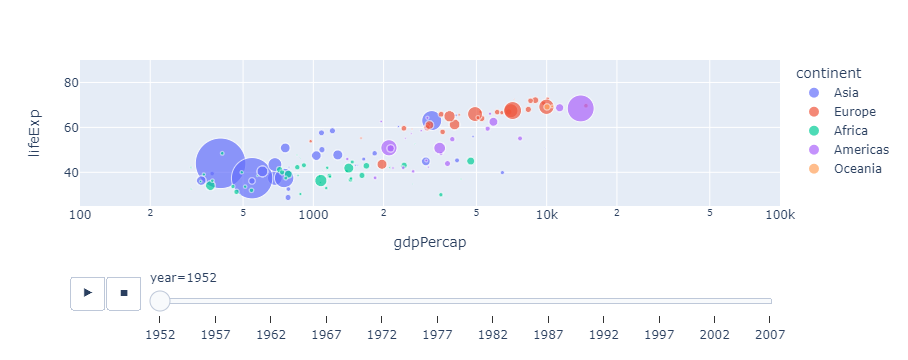

In [230]:
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()

fig.write_html("images/life_exp.html")